# KMEANs classifier

### Here are some handy keyboard shortcuts



##### 'escape' + 'a' will create a new cell above the current cell
##### 'escape' + 'b' will create a new cell below the current cell
##### 'escape' + 'm' will create a new header cell type

##### 'shift' + 'enter' will run the selected cell


In [1]:
import rasterio
import numpy as np

from sklearn import cluster
from osgeo import gdal, gdal_array
import matplotlib.pyplot as plt
# Tell GDAL to throw Python exceptions, and register all drivers
gdal.UseExceptions()
gdal.AllRegister()



In [2]:
# Read in raster image
img_ds = gdal.Open(r'C:\Users\user\Desktop\COGS\Major project\Images/BlackLakeEAST.tif', gdal.GA_ReadOnly)
img = np.zeros((img_ds.RasterYSize, img_ds.RasterXSize, img_ds.RasterCount),
               gdal_array.GDALTypeCodeToNumericTypeCode(img_ds.GetRasterBand(1).DataType))

#loop over bands
for b in range(img.shape[2]):
    img[:, :, b] = img_ds.GetRasterBand(b + 1).ReadAsArray()

In [3]:
#reshape array
new_shape = (img.shape[0] * img.shape[1], img.shape[2])

In [4]:
X = img[:, :, :13].reshape(new_shape)

In [5]:
k_means = cluster.MiniBatchKMeans(n_clusters=8)
k_means.fit(X)

X_cluster = k_means.labels_
X_cluster = X_cluster.reshape(img[:, :, 0].shape)

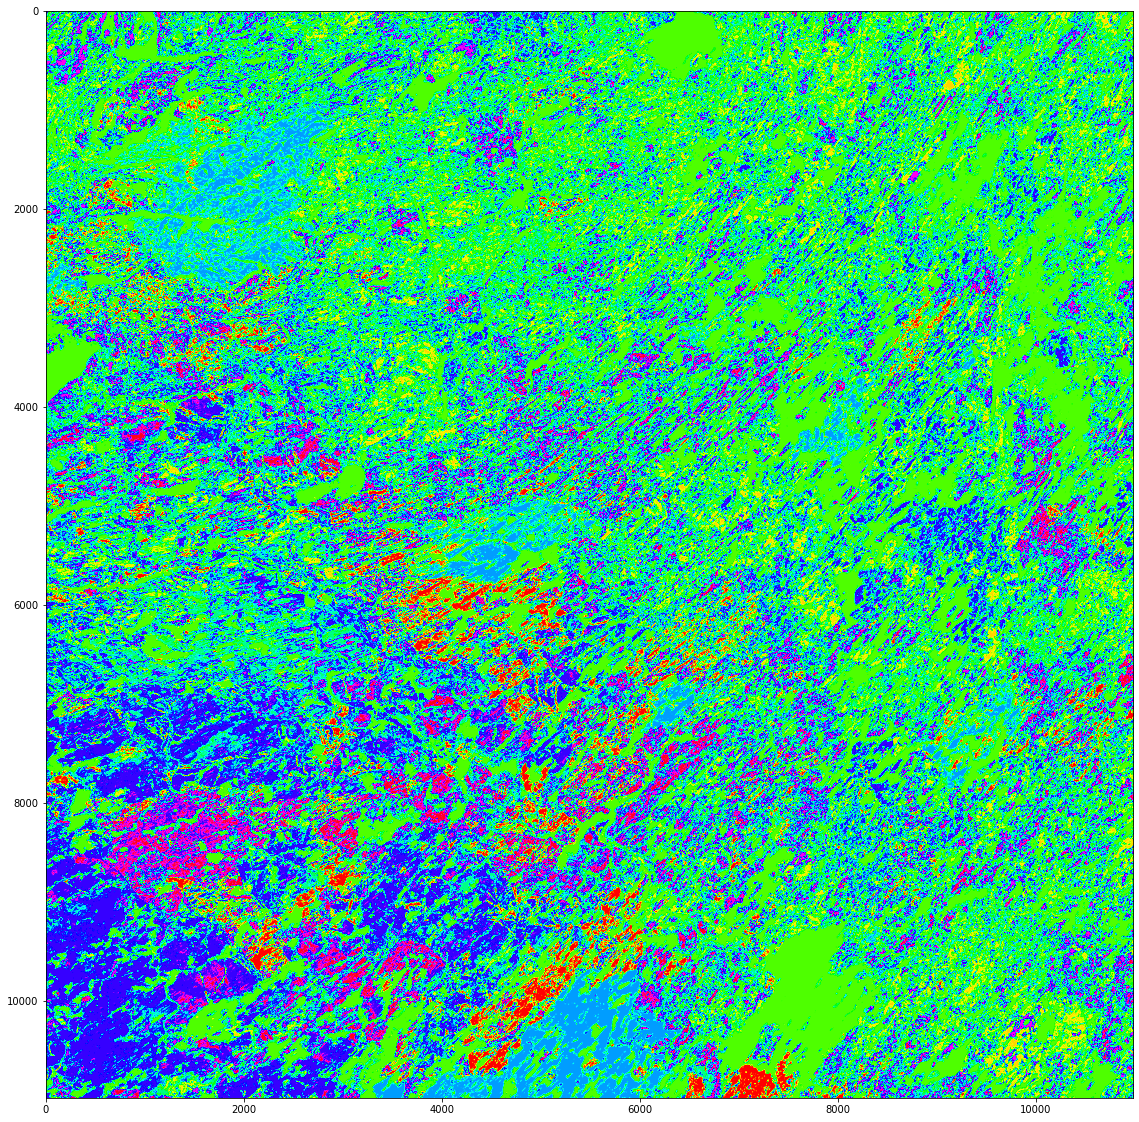

In [6]:
plt.figure(figsize=(20,20))
plt.imshow(X_cluster, cmap="hsv")

plt.show()
# when n=8, the segments 3 and 4 best represent the Black Spruce forest

In [9]:
ds = gdal.Open(r'C:\Users\user\Desktop\COGS\Major project\Images\BlackLakeEAST.tif')
band = ds.GetRasterBand(2)
arr = band.ReadAsArray()
[cols, rows] = arr.shape

format = "GTiff"
driver = gdal.GetDriverByName(format)


outDataRaster = driver.Create(r'C:\Users\user\Desktop\COGS\Major project\Images\k_means.gtif', rows, cols, 1, gdal.GDT_Byte)
outDataRaster.SetGeoTransform(ds.GetGeoTransform())##sets same geotransform as input
outDataRaster.SetProjection(ds.GetProjection())##sets same projection as input


outDataRaster.GetRasterBand(1).WriteArray(X_cluster)

outDataRaster.FlushCache() ## remove from memory
del outDataRaster ## delete the data (not the actual geotiff)

# Band Ratio calculations

In [ ]:
# connect to files
fili_sentinel = "path/to/satellite.tif"
fili_mask = "path/to/mask.tif"

In [ ]:
# open your image
ds_image = gdal.Open(fili_sentinel)
ds_mask = gdal.Open(fili_mask)

In [ ]:
# to check info of arrays - this will tell you width, height, and depth of the raster array
ds_mask.shape

In [ ]:
# double and triple check that these are the correct band mappings for gdal
blue = ds.GetRasterBand(1)
green = ds.GetRasterBand(2)
red = ds.GetRasterBand(3)
nir = ds.GetRasterBand(4)

mask = ds.GetRasterBand() # fill this in accordingly

In [1]:
# after ensuring that the bands are properly mapped, running this cell will calculate the below ratios

ndvi = (nir - red) / (nir + red)
ndre = 
evi = 
vigs = 


# normalize the outputs - find a normalizaiton method and use the same
ndvi_normalize = 
ndri_normalize = 
evi_nor...


SyntaxError: invalid syntax (Temp/ipykernel_11020/3630721980.py, line 2)

In [ ]:
# now you can mask these out by simply multiplying by the raster mask - this is creating the full area mask
ndvi_masked = ndvi * mask


In [ ]:
# clip out the target areas (this can be done in Q, or it can be done here using 'geopandas')


In [ ]:
# create scatterplots (matplotlib)
# Ensure you're using the normalized band ratios


In [2]:
# export the images to inspect


In [ ]:
# 